<class 'method'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   category           150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


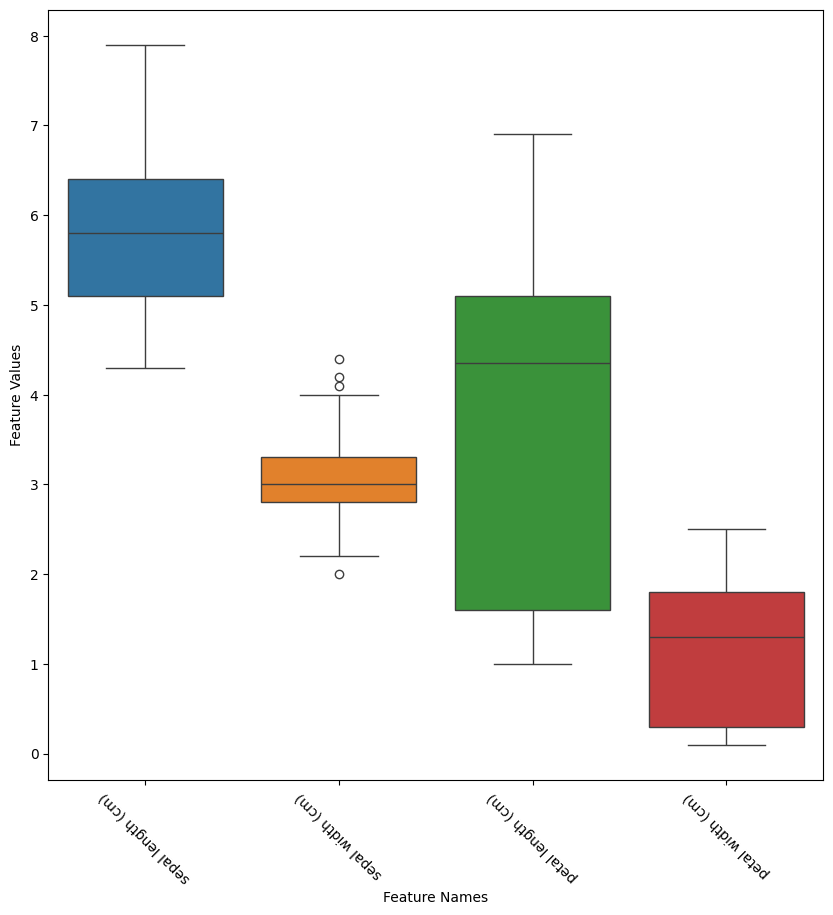

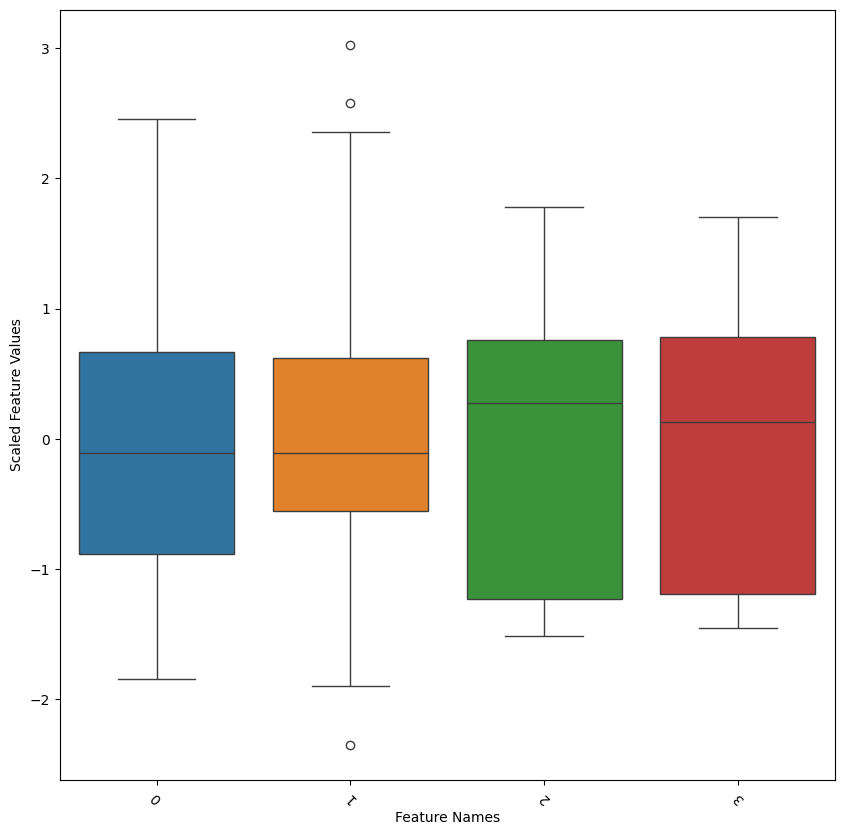

Accuracy Score: 0.9
Confusion Matrix: 
 [[10  0  0]
 [ 0  8  2]
 [ 0  1  9]]


/Users/kshitizgupta/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


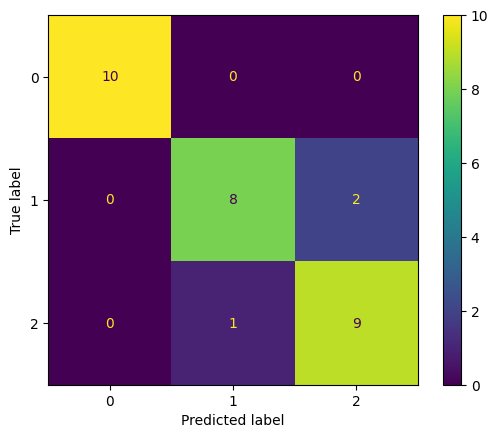

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load the Iris dataset
iris_dataset = load_iris()
data_frame = pd.DataFrame(data=iris_dataset.data, columns=iris_dataset.feature_names)
data_frame['category'] = iris_dataset.target
data_frame['category'] = data_frame['category'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Checking for missing values and duplicate entries
data_frame.isnull().sum()
data_frame.duplicated().sum()
data_frame = data_frame.drop_duplicates

# Printing type of dataframe
print(type(data_frame))

# Reset dataframe
del data_frame
data_frame = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
data_frame['category'] = iris_dataset.target
data_frame['category'] = data_frame['category'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display dataset information
print(type(data_frame))
data_frame.info()
data_frame.describe()

# Define features and target variable
independent_vars = data_frame.drop('category', axis=1)
dependent_var = data_frame['category']

# Visualizing feature distribution using boxplot
plt.figure(figsize=(10, 10))
sns.boxplot(data=independent_vars, orient='v')
plt.xticks(rotation=135)
plt.xlabel('Feature Names')
plt.ylabel('Feature Values')
plt.show()

# Import necessary libraries for training and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(independent_vars, dependent_var, test_size=0.2, random_state=42, stratify=dependent_var)

# Standardizing the data
scaler_object = StandardScaler()
train_x_scaled = scaler_object.fit_transform(train_x)
test_x_scaled = scaler_object.transform(test_x)

# Boxplot for scaled features
plt.figure(figsize=(10, 10))
sns.boxplot(data=train_x_scaled, orient='v')
plt.xticks(rotation=135)
plt.xlabel('Feature Names')
plt.ylabel('Scaled Feature Values')
plt.show()

# Checking class distribution
data_frame['category'].value_counts(normalize=True)

# Import classification model and evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

# Initialize and train Logistic Regression model
logistic_model = LogisticRegression(multi_class='ovr')
logistic_model.fit(train_x_scaled, train_y)

# Making predictions
predictions = logistic_model.predict(test_x_scaled)

# Printing evaluation results
print('Accuracy Score:', accuracy_score(test_y, predictions))
print('Confusion Matrix: \n', confusion_matrix(test_y, predictions))

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix(test_y, predictions)).plot()
plt.show()

# Save trained model using pickle
import pickle
pickle.dump(logistic_model, open('iris_trained_model.pkl', 'wb'))
